<a href="https://colab.research.google.com/github/hafizur45/weight-and-gender-prediction-using-knn-and-linear-regression/blob/main/knn_and_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/weight-height.csv')

In [ ]:
df=pd.DataFrame(df)
df1=df.copy()

In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.sort_values(['Weight'])

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
5360,Female,55.668202,68.982530
6624,Female,54.616858,71.393749
7935,Female,58.211650,77.523774
...,...,...,...
3285,Male,78.528210,253.889004
4331,Male,76.848761,254.209073
994,Male,78.095867,255.690835
1610,Male,76.617546,255.863326


In [ ]:
df.shape

(8555, 3)

In [ ]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

<BarContainer object of 8555 artists>

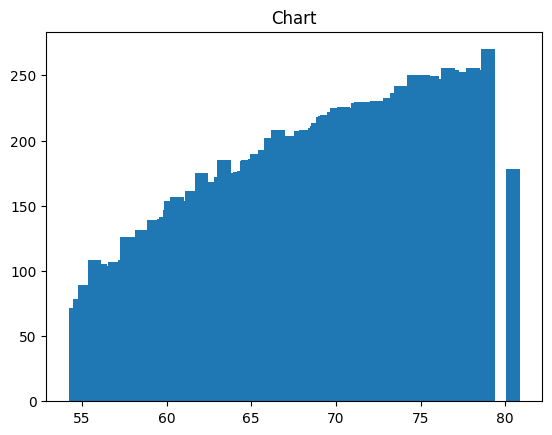

In [ ]:
plt.title('Chart')
x=df['Height']
y=df['Weight']
plt.bar(x,y)

In [ ]:
from sklearn.preprocessing import LabelEncoder as le



In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
en=le()
df.Gender=en.fit_transform(df.Gender)

In [ ]:
x=df[['Height','Gender']]

In [ ]:
x

,Height,Gender
0,73.847017,1
1,68.781904,1
2,74.110105,1
3,71.730978,1
4,69.881796,1
...,...,...
8550,60.483946,0
8551,63.423372,0
8552,65.584057,0
8553,67.429971,0


In [ ]:
y=df[['Weight']]

In [ ]:
y

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
8550,110.565497
8551,129.921671
8552,155.942671
8553,151.678405


In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression as lr


In [ ]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.3,random_state=1)

In [ ]:
xtr=x_train
xte=x_test
ytr=y_train
yte=y_test

In [ ]:
model=lr()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.predict([[73.847017,1]])
model.predict([[60.48394,0]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[116.46823108]])

In [ ]:
df[8550:85502]

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


In [ ]:
model.score(x_test,y_test)


0.9059959607091161

In [ ]:
m=model.coef_
c=model.intercept_

In [ ]:
predict=m*60.921791 + c

In [ ]:
predict


array([[119.0817087, 933.8935345]])

In [ ]:
MSE=mse(y_test,model.predict(x_test))

In [ ]:
MSE

99.67250998070027

Prediction using knn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as kn

In [ ]:
knn= kn(2)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
knn.predict(x_test)

array([[154.0318258 ],
       [191.1865103 ],
       [180.2224439 ],
       ...,
       [157.55985525],
       [179.10440795],
       [206.5288537 ]])

In [ ]:
yte

,Weight
7154,160.800726
3258,184.516688
2188,184.262796
5609,166.844114
3186,200.466282
...,...
8004,110.815421
7644,148.605255
8521,153.436481
957,170.310122


In [ ]:
knn_test_score=knn.score(x_test,y_test)

In [ ]:
knn_test_score

0.8540577303117753

In [ ]:
knn_train_score = knn.score(x_train,y_train)

In [ ]:
knn_train_score

0.9485505412365839

In [ ]:
kmse_test = mse(y_test,knn.predict(x_test))

In [ ]:
kmse

154.74263065540717

In [ ]:
kmse_train=mse(y_train,knn.predict(x_train))

In [ ]:
kmse_train

52.07613262529017

Knn Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knc

In [ ]:
knn_model = knc(5)

In [ ]:
x=df[['Height','Weight']]

In [ ]:
x

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [132]:
y=df[['Gender']]

In [133]:
y

,Gender
0,1
1,1
2,1
3,1
4,1
...,...
8550,0
8551,0
8552,0
8553,0


In [134]:
x_tr,x_te,y_tr,y_te = tts(x,y,test_size=0.3,random_state=1)

In [135]:
knn_model.fit(x_tr,y_tr)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [138]:
predict=knn_model.predict(x_tr)
predict

array([1, 0, 0, ..., 1, 0, 1])

In [137]:
y_tr

,Gender
1277,1
5361,0
5728,0
4276,1
3112,1
...,...
2895,1
7813,0
905,1
5192,0


In [144]:
df1.head(100)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
95,Male,65.117485,165.717112
96,Male,71.701234,193.094164
97,Male,66.832878,180.683887
98,Male,66.471275,172.773723


In [145]:
knn_model.predict([[60.483946,110.565497]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [146]:
score=knn_model.score(x_tr,y_tr)

In [147]:
#train score
score

0.9263527054108216

In [148]:
testScore=knn_model.score(x_te,y_te)

In [149]:
#test score
testScore

0.9146864043630697

In [150]:
#training MSE
kcmse = mse(y_tr,knn_model.predict(x_tr))
kcmse

0.07364729458917836

In [151]:
#testing MSE
kcmse = mse(y_te,knn_model.predict(x_te))
kcmse

0.08531359563693026